<a href="https://colab.research.google.com/github/vermasparshika02/-Insurance-Claims-Risk-Analysis/blob/main/Insurance_Claims_%26_Risk_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

np.random.seed(42)
n = 20000

df = pd.DataFrame({
    'policy_id': range(1, n + 1),
    'age': np.random.randint(18, 70, n),
    'region': np.random.choice(['North', 'South', 'East', 'West'], n),
    'policy_type': np.random.choice(['Health', 'Motor', 'Life'], n, p=[0.5, 0.3, 0.2]),
    'premium': np.random.randint(5000, 40000, n),
    'claim_flag': np.random.choice([0, 1], n, p=[0.75, 0.25]),
    'claim_days': np.random.randint(5, 60, n)
})

df['claim_amount'] = np.where(
    df['claim_flag'] == 1,
    np.random.randint(3000, 80000, n),
    0
)

df.to_csv("insurance_data.csv", index=False)
df.head()


,policy_id,age,region,policy_type,premium,claim_flag,claim_days,claim_amount
0,1,56,North,Motor,33685,0,16,0
1,2,69,East,Health,5269,0,27,0
2,3,46,East,Health,18365,0,53,0
3,4,32,West,Health,22538,1,36,13346
4,5,60,North,Motor,35468,0,52,0


In [ ]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   policy_id     20000 non-null  int64 
 1   age           20000 non-null  int64 
 2   region        20000 non-null  object
 3   policy_type   20000 non-null  object
 4   premium       20000 non-null  int64 
 5   claim_flag    20000 non-null  int64 
 6   claim_days    20000 non-null  int64 
 7   claim_amount  20000 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 1.2+ MB


,policy_id,age,premium,claim_flag,claim_days,claim_amount
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,10000.500000,43.437700,22614.221600,0.251400,31.956550,10314.629550
std,5773.647028,14.943908,10105.019609,0.433829,15.865212,21070.325936
min,1.000000,18.000000,5001.000000,0.000000,5.000000,0.000000
25%,5000.750000,31.000000,13873.750000,0.000000,18.000000,0.000000
50%,10000.500000,43.000000,22650.500000,0.000000,32.000000,0.000000
75%,15000.250000,56.000000,31305.500000,1.000000,46.000000,3426.000000
max,20000.000000,69.000000,39999.000000,1.000000,59.000000,79980.000000


In [ ]:
!ls


insurance_data.csv  sample_data


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("insurance_data.csv")
df.head()


,policy_id,age,region,policy_type,premium,claim_flag,claim_days,claim_amount
0,1,56,North,Motor,33685,0,16,0
1,2,69,East,Health,5269,0,27,0
2,3,46,East,Health,18365,0,53,0
3,4,32,West,Health,22538,1,36,13346
4,5,60,North,Motor,35468,0,52,0


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   policy_id     20000 non-null  int64 
 1   age           20000 non-null  int64 
 2   region        20000 non-null  object
 3   policy_type   20000 non-null  object
 4   premium       20000 non-null  int64 
 5   claim_flag    20000 non-null  int64 
 6   claim_days    20000 non-null  int64 
 7   claim_amount  20000 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 1.2+ MB


In [ ]:
df.describe()


,policy_id,age,premium,claim_flag,claim_days,claim_amount
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,10000.500000,43.437700,22614.221600,0.251400,31.956550,10314.629550
std,5773.647028,14.943908,10105.019609,0.433829,15.865212,21070.325936
min,1.000000,18.000000,5001.000000,0.000000,5.000000,0.000000
25%,5000.750000,31.000000,13873.750000,0.000000,18.000000,0.000000
50%,10000.500000,43.000000,22650.500000,0.000000,32.000000,0.000000
75%,15000.250000,56.000000,31305.500000,1.000000,46.000000,3426.000000
max,20000.000000,69.000000,39999.000000,1.000000,59.000000,79980.000000


In [ ]:
print("Total policies:", len(df))
print("Total claims:", df['claim_flag'].sum())
print("Claim rate (%):", round(df['claim_flag'].mean() * 100, 2))


Total policies: 20000
Total claims: 5028
Claim rate (%): 25.14


## Business Questions

1. Which policy types have the highest claim ratio and loss impact?
2. Which regions show the highest claim frequency and risk exposure?
3. Which customer segments are consistently loss-making?
4. How do claim settlement times vary across policy types?



# FIRST Business Question (Policy Type Risk)

In [ ]:
policy_summary = (
    df.groupby('policy_type')
      .agg(
          total_premium=('premium', 'sum'),
          total_claims=('claim_amount', 'sum'),
          claim_ratio=('claim_amount', 'sum')
      )
)

policy_summary['claim_ratio'] = (
    policy_summary['total_claims'] / policy_summary['total_premium']
)

policy_summary.sort_values(by='claim_ratio', ascending=False)


,total_premium,total_claims,claim_ratio
policy_type,,,
Motor,136760082,64552033,0.472009
Life,90193239,41277547,0.457657
Health,225331111,100463011,0.445846


# Regional Risk Analysis

In [ ]:
region_summary = (
    df.groupby('region')
      .agg(
          policies=('policy_id', 'count'),
          claims=('claim_flag', 'sum')
      )
)

region_summary['claim_frequency'] = (
    region_summary['claims'] / region_summary['policies']
)

region_summary.sort_values(by='claim_frequency', ascending=False)


,policies,claims,claim_frequency
region,,,
North,5029,1290,0.256512
West,5056,1284,0.253956
East,4968,1236,0.248792
South,4947,1218,0.246210


# Loss-Making Policies

In [ ]:
loss_making = df[df['claim_amount'] > df['premium']]
loss_making.head()


,policy_id,age,region,policy_type,premium,claim_flag,claim_days,claim_amount
7,8,56,East,Motor,27020,1,54,39538
9,10,40,East,Motor,9522,1,33,27532
12,13,41,North,Health,9163,1,20,71293
16,17,20,East,Life,15853,1,30,68443
17,18,39,East,Life,31927,1,15,60004


In [ ]:
print("Loss-making policies:", len(loss_making))
print("Percentage of total:", round(len(loss_making) / len(df) * 100, 2), "%")


Loss-making policies: 3676
Percentage of total: 18.38 %


# ***VISUALS***

Claim Ratio by Policy Type

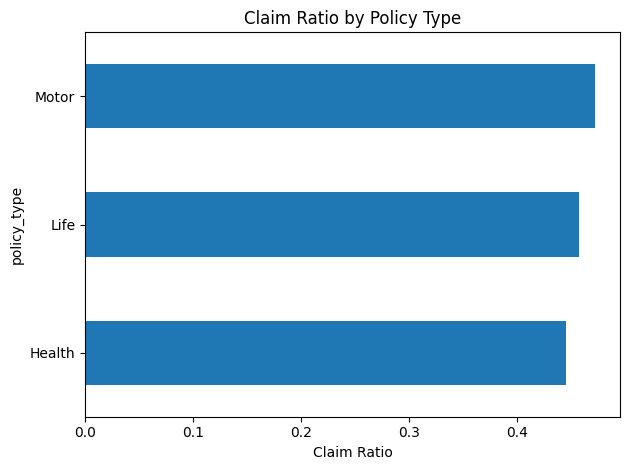

In [ ]:
import matplotlib.pyplot as plt

policy_summary.sort_values('claim_ratio').plot(
    kind='barh',
    y='claim_ratio',
    legend=False,
    title='Claim Ratio by Policy Type'
)

plt.xlabel('Claim Ratio')
plt.tight_layout()
plt.show()


 Claim Frequency by Region

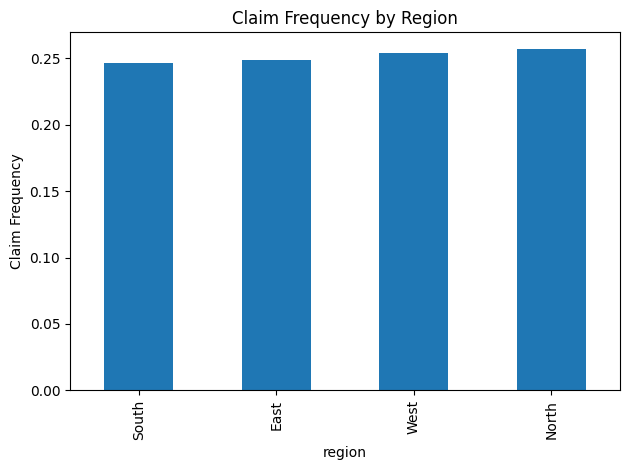

In [ ]:
region_summary.sort_values('claim_frequency').plot(
    kind='bar',
    y='claim_frequency',
    legend=False,
    title='Claim Frequency by Region'
)

plt.ylabel('Claim Frequency')
plt.tight_layout()
plt.show()


# EXPORTING TABLES FOR POWER BI / SQL

In [ ]:
policy_summary.reset_index().to_csv(
    "policy_risk_summary.csv", index=False
)

region_summary.reset_index().to_csv(
    "region_risk_summary.csv", index=False
)

loss_making.to_csv(
    "loss_making_policies.csv", index=False
)

print("✓ Exported summary tables for Power BI")


✓ Exported summary tables for Power BI
